<h1> user_experience_analysis</h1>

<h2> Imporing data and packages </h2>

In [1]:
# importing essential libraries

import pandas as pd
import numpy as np
import os
import warnings
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Suppressing warning messages

warnings.filterwarnings('ignore')

In [3]:
# Setting paths to files and folders

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) # setting path to parent directory
scripts_dir = os.path.join(parent_dir,"scripts") # setting path to scripts directory
data_path = os.path.join(parent_dir,"data","teleco_user_engagement_data.csv") 
sys.path.insert(1, scripts_dir)

In [4]:
# Importing summarizing script

from data_summarizing_functions import DataSummarizer as Sumar
sumar = Sumar()

In [5]:
# Importing relevant dataframe

user_df = pd.read_csv(data_path)

<h2> Exploring Users by Experience Features

In [6]:
# Top 10 users with best experience based on RTT and TCP.
# since improvement in experience means decrease in RTT and TCP, lets check the bottom 10
# users

sumar.show_N_per_col(user_df, "MSISDN/Number", ["RTT total", "TCP total"], 10, "bottom")


Top 10 customers based on RTT total

       MSISDN/Number  RTT total
44748   3.366158e+10      0.000
28878   3.365298e+10      0.000
39066   3.366020e+10      0.002
83396   3.369505e+10      0.004
36039   3.365949e+10      0.005
40873   3.366064e+10      0.005
66098   3.366748e+10      0.005
88903   3.369954e+10      0.005
98541   3.376275e+10      0.005
69662   3.366862e+10      0.006

Top 10 customers based on TCP total

        MSISDN/Number  TCP total
23472    3.365013e+10   0.000097
6359     3.361478e+10   0.000128
96977    3.376206e+10   0.000129
13546    3.362636e+10   0.000134
2177     3.360783e+10   0.000143
25863    3.365068e+10   0.000176
102198   3.376964e+10   0.000176
105775   3.378420e+10   0.000177
78100    3.367937e+10   0.000179
89395    3.369969e+10   0.000182


In [7]:
# Bottom 10 users based on thoroughput

sumar.show_N_per_col(user_df, "MSISDN/Number", ["TP total"], 10,)


Top 10 customers based on TP total

       MSISDN/Number  TP total
37470   3.365982e+10  270523.0
69394   3.366855e+10  268462.0
50019   3.366278e+10  264841.0
35744   3.365943e+10  238565.0
96970   3.376206e+10  238381.0
45694   3.366180e+10  236750.0
57241   3.366471e+10  236416.0
52680   3.366345e+10  233710.0
92577   3.376041e+10  230376.0
32519   3.365875e+10  229787.0


In [8]:
# Showing the bottom 10 users based on RTT and TCP

sumar.show_N_per_col(user_df, "MSISDN/Number", ["RTT total", "TCP total"], 10)


Top 10 customers based on RTT total

       MSISDN/Number  RTT total
76363   3.367588e+10      0.991
94654   3.376127e+10      0.839
37470   3.365982e+10      0.794
37052   3.365973e+10      0.782
60338   3.366553e+10      0.775
92577   3.376041e+10      0.767
92923   3.376054e+10      0.754
6437    3.361489e+10      0.730
1279    3.360452e+10      0.708
13994   3.362708e+10      0.702

Top 10 customers based on TCP total

       MSISDN/Number  TCP total
6437    3.361489e+10   2.537904
88365   3.369938e+10   2.282083
72618   3.366964e+10   1.791952
30225   3.365826e+10   1.768576
96947   3.376205e+10   1.687040
61557   3.366598e+10   1.577874
87735   3.369920e+10   1.493445
35436   3.365936e+10   1.465658
41431   3.366075e+10   1.463477
8320    3.361800e+10   1.444513


In [9]:
# Showing the bottom 10 users based on TP

sumar.show_N_per_col(user_df, "MSISDN/Number", ["TP total"], 10, "bottom")


Top 10 customers based on TP total

        MSISDN/Number  TP total
105174   3.378308e+10       0.0
91064    3.375346e+10       0.0
28037    3.365185e+10       0.0
17447    3.363392e+10       0.0
42800    3.366109e+10       0.0
27424    3.365116e+10       0.0
27067    3.365096e+10       0.0
101605   3.376862e+10       0.0
94744    3.376131e+10       0.0
17283    3.363359e+10       0.0


In [10]:
# aggregating based on handset types 

grouping_lis = ["Handset"]
aggr_lis = ["TP total", "TCP total", "RTT total"] 
metric_lis = ["mean", "mean", "count"]
col_names = ["mean_TP", "mean_TCP", "user_count"]

handset_aggr_df = sumar.find_agg(user_df, grouping_lis, aggr_lis, metric_lis, col_names)


In [11]:
handset_aggr_df.head()

,Handset,mean_TP,mean_TCP,user_count
0,A-Link Telecom I. Cubot A5,23510.0,0.040345,1
1,A-Link Telecom I. Cubot Note Plus,6699.0,0.049515,1
2,A-Link Telecom I. Cubot Note S,8937.0,0.040345,1
3,A-Link Telecom I. Cubot Nova,610.0,0.137170,1
4,A-Link Telecom I. Cubot Power,402.0,0.008041,1


In [12]:
# showing the top 10 handset types based on user experience metrics

sumar.show_N_per_col(handset_aggr_df, "Handset", ["mean_TP", "mean_TCP", "user_count"], 10)


Top 10 customers based on mean_TP

                                 Handset  mean_TP
606                              Lg-H860  76392.0
315                     Huawei B525S-65A  59667.0
1355      Xiaomi Communica. Redmi Note 2  49381.0
1326          Xiaomi Communica. M1803E1A  49226.0
796                 Qingdao Hisense. S41  48805.0
405   Huawei Nova 2I Huawei Mate 10 Lite  47661.0
275                          Htc 2Q6E100  47493.0
565                        Lephone U Pro  45669.0
435                      Huawei Stf-Tl10  45257.0
441                      Huawei Vns-Dl00  45143.0

Top 10 customers based on mean_TCP

                                  Handset  mean_TCP
936          Samsung Galaxy S4 (Gt-I9515)  0.690295
740              Nubia Technology. Nx569H  0.565497
169            Civicom Technolo. European  0.551212
1368              Yota Devices Yotaphone2  0.547002
711                   Nokia 800 Nokia 800  0.534571
120   Asustek Asus Zc521Tl Zenfone 3S Max  0.520088
1158         

<h2> Clustering by experience metrics

In [13]:
# Selecting the experience metrics

features = ["RTT total", "TP total", "TCP total"]

In [14]:
# generating clusters and adding a cluster column

normalised_df, data_with_clusters, kmeans = sumar.clusterGenerator(user_df, features, 3, "Clusters_exp")

In [15]:
# aggregating by clusters

clus_min_df = sumar.find_agg(data_with_clusters, "Clusters_exp",features, ["min", "min", "min"], ["RTT", "TP", "TCP"])
clus_mean_df = sumar.find_agg(data_with_clusters, "Clusters_exp", features, ["mean", "mean", "mean"], ["RTT mean", "TP mean", "TCP mean"])


In [16]:
clus_min_df

,Clusters_exp,RTT,TP,TCP
0,0,0.021,11.0,0.001617
1,1,0.000,0.0,0.000097
2,2,0.062,228.0,0.060168


In [17]:
clus_mean_df

,Clusters_exp,RTT mean,TP mean,TCP mean
0,0,0.109948,26718.389128,0.169938
1,1,0.054143,3340.097555,0.045963
2,2,0.283638,88216.059279,0.391794


In [18]:
# lets get the center of the poorest exp cluster
# and calculate the experience score

center = kmeans.cluster_centers_[2]
normalised_df = sumar.calcScore(normalised_df, center, features, "exp_score")

In [19]:
# Adding experience score to the dataframe

data_with_clusters["exp_score"] = normalised_df["exp_score"]
data_with_clusters.head()

,MSISDN/Number,xDr_session_count,session_dur,Handset,Total_DL,Total_UL,total_vol,RTT total,TP total,TCP total,...,google,gaming,email,social,other,Decile,Clusters_eng,eng_score,Clusters_exp,exp_score
0,3.360100e+10,1,116.720,Huawei P20 Lite Huawei Nova 3E,842.637466,36.053108,878.690574,0.046,76.0,0.040345,...,4.389005,812.458661,1.331362,2.232135,386.570872,5,0,22.302560,1,31.268994
1,3.360100e+10,1,181.230,Apple iPhone 7 (A1778),120.755184,36.104459,156.859643,0.031,99.0,0.040345,...,5.334863,119.750078,3.307781,2.660565,281.710071,8,0,24.442388,1,32.104480
2,3.360100e+10,1,134.969,undefined,556.659663,39.306820,595.966483,0.050,97.0,0.040345,...,3.443126,538.827713,3.205380,3.195623,501.693672,6,0,23.092519,1,31.047598
3,3.360101e+10,1,49.878,Apple iPhone 5S (A1457),401.993172,20.327526,422.320698,0.084,248.0,0.005760,...,9.678493,391.126127,2.284670,0.280294,35.279702,1,0,25.763501,1,30.042978
4,3.360101e+10,2,37.104,Apple iPhone Se (A1723),1363.130417,94.280527,1457.410944,0.119,40489.0,0.080691,...,18.499616,1314.797820,3.305469,2.912542,804.804484,1,2,19.485558,0,21.232561


<Figure size 432x288 with 0 Axes>

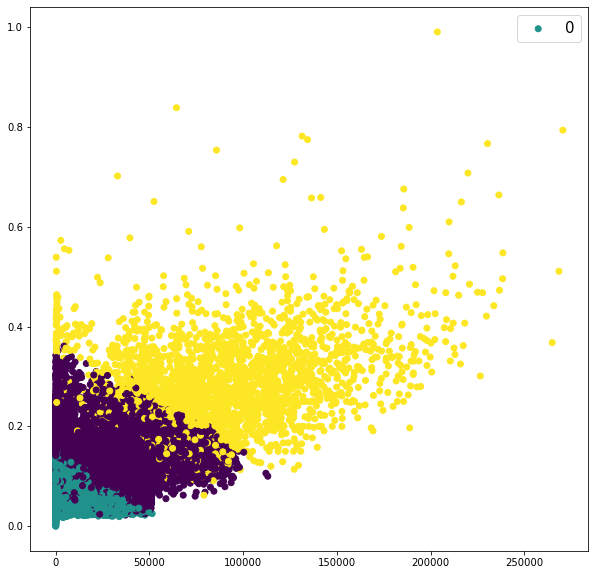

In [20]:
plt.figure()
plt.figure(figsize=(10,10))
plt.scatter(data_with_clusters['TP total'], data_with_clusters['RTT total'], c =data_with_clusters['Clusters_exp'])

plt.legend([0,1,2],prop={'size': 15})
plt.show()

In [21]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(normalised_df)
    Sum_of_squared_distances.append(km.inertia_)

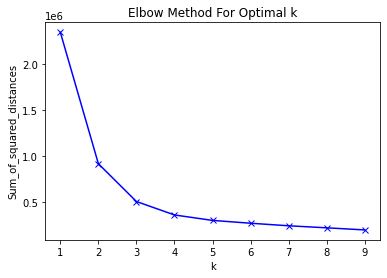

In [22]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

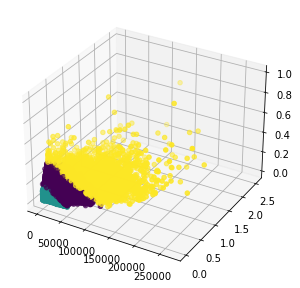

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_with_clusters['TP total'],data_with_clusters['TCP total'], data_with_clusters['RTT total'], c =data_with_clusters['Clusters_exp'])

In [24]:
save_data_path_5 = os.path.join(parent_dir,"data","teleco_user_exp_data.csv") # setting path to data directory
data_with_clusters.to_csv(save_data_path_5, index=False)